d:\ProgramData\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


Dropped 0.2% entries from factor data: 0.2% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Information Analysis


,1D,5D
IC Mean,-0.000,-0.000
IC Std.,0.023,0.022
Risk-Adjusted IC,-0.004,-0.001
t-stat(IC),-0.246,-0.066
p-value(IC),0.806,0.947
IC Skew,-0.056,-0.046
IC Kurtosis,0.103,0.056


<Figure size 432x288 with 0 Axes>

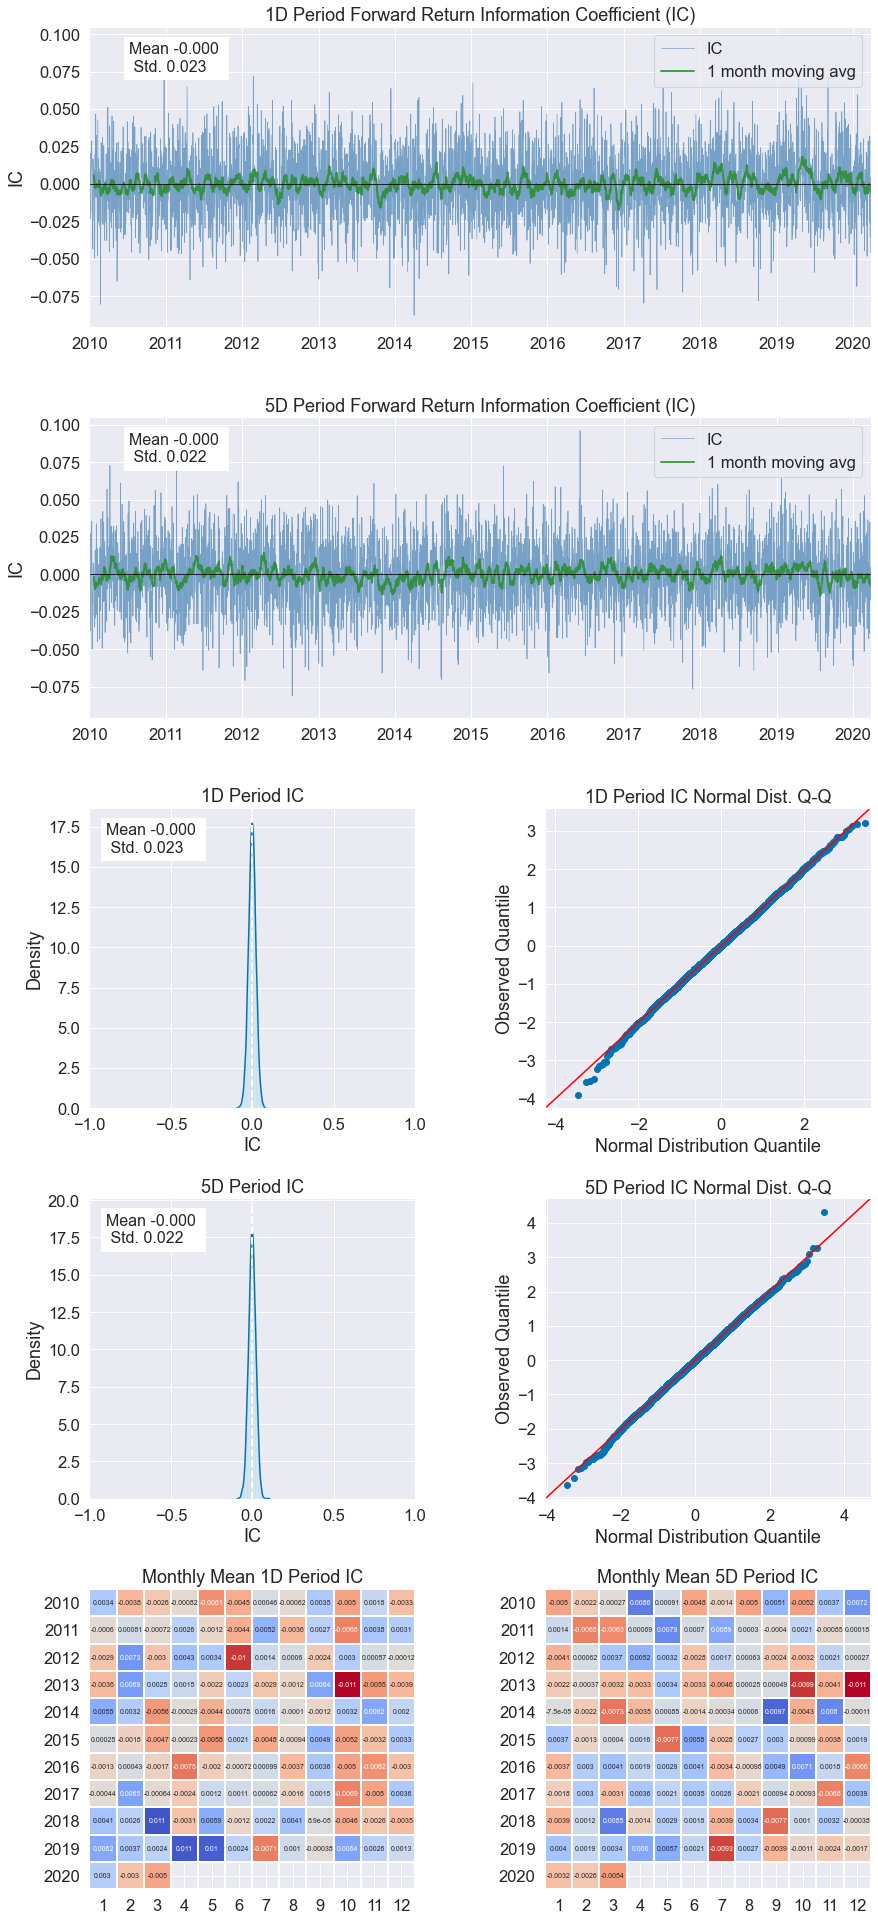

Returns Analysis


,1D,5D
Ann. alpha,-1.000,787982.895
beta,0.060,-0.118
Mean Period Wise Return Top Quantile (bps),-756.521,-272.236
Mean Period Wise Return Bottom Quantile (bps),-372.044,-38.807
Mean Period Wise Spread (bps),-384.477,-67.419


<Figure size 432x288 with 0 Axes>

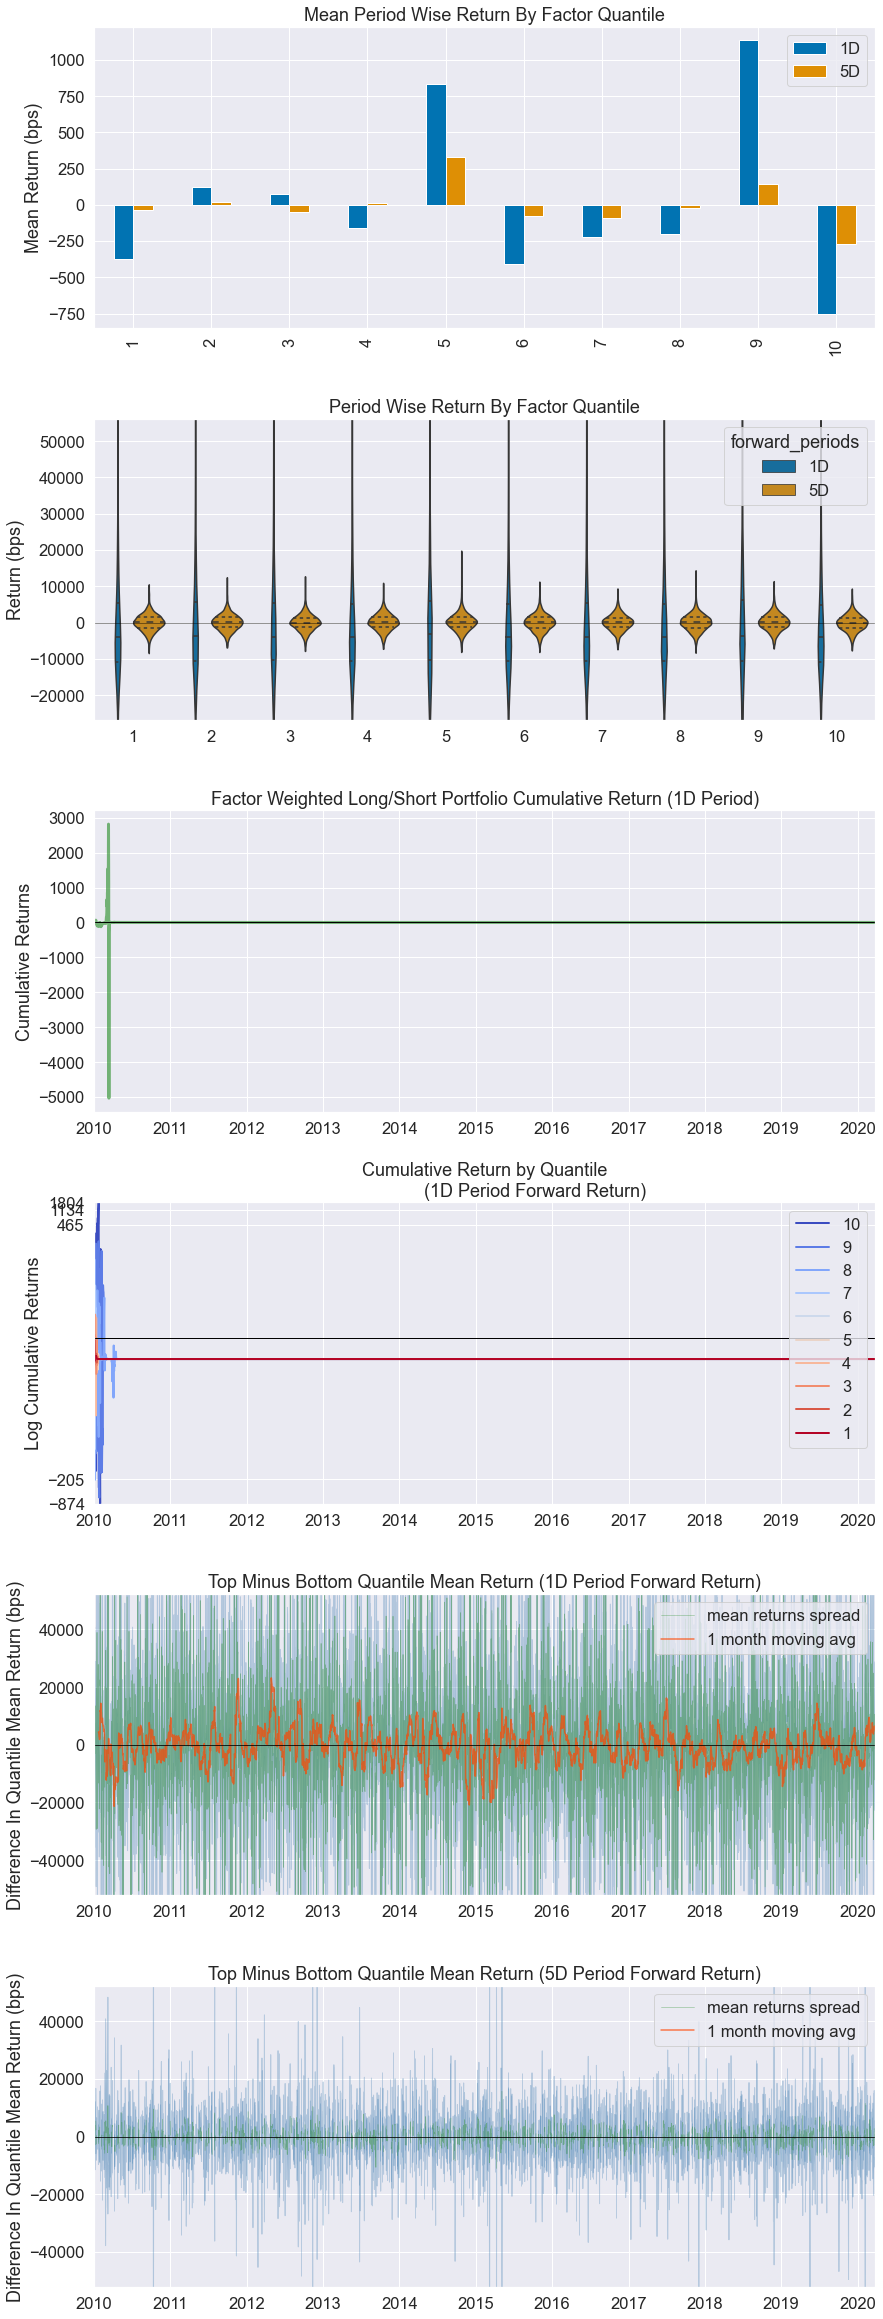

In [1]:
# -*- coding: utf-8 -*-
# @Time     ：2021/9/18  13:26 
# @Author   ：百载文枢江左
import alphalens
import pandas as pd
import random
import warnings
warnings.filterwarnings('ignore')


if __name__ == '__main__':
    # 模拟的交易日期序列
    trade_date_ls = pd.date_range('1/1/2010', '31/3/2020').tolist()
    # 模拟的股票代码序列
    stock_id_ls = [f"{'0' * (6 - len(str(i)))}{i}.SZ" for i in range(2000)]

    # 输入因子矩阵
    factor_ls = []
    for trade_date in trade_date_ls:
        for stock_id in stock_id_ls:
            factor_ls.append([trade_date, stock_id, random.random() / 100])
    factor = pd.DataFrame(factor_ls, columns=['trade_date', 'stock_id', 'factor1'])
    factor = factor.set_index(['trade_date', 'stock_id'])

    # 输入价格矩阵
    prices_ls = []
    for trade_date in trade_date_ls:
        tmp = [random.random() / 100 for _ in range(len(stock_id_ls))]
        tmp.append(trade_date)
        prices_ls.append(tmp)
    prices = pd.DataFrame(prices_ls, columns=['trade_date' if i == len(stock_id_ls) else stock_id_ls[i] for i in range(len(stock_id_ls) + 1)])
    prices = prices.set_index(['trade_date'])

    # periods表示调仓周期
    # bins表示分组数量
    input_df = alphalens.utils.get_clean_factor_and_forward_returns(factor, prices, periods=(1, 5, ), bins=10, quantiles=None)
    alphalens.tears.create_information_tear_sheet(input_df)
    alphalens.tears.create_returns_tear_sheet(input_df)


In [10]:
# 保留日期部分，去除时间
factor.index = factor.index.set_levels([factor.index.levels[0].normalize(), factor.index.levels[1]])
#prices.index = prices.index.normalize()
print(factor.head())
#print(prices.head())
# 假设我们的资产标识符是 'AAPL'
asset_identifier = 'AAPL'

# 创建一个MultiIndex
multi_index = pd.MultiIndex.from_product([prices.index, [asset_identifier]], names=['date', 'asset'])

# 创建一个新的Series，它的索引是我们刚刚创建的MultiIndex
prices_multi = pd.Series(prices.values, index=multi_index, name='price')

# 现在prices_multi是适合alphalens使用的MultiIndex格式
print(prices_multi.head())

                       factor1
date       asset              
2010-01-01 000000.SZ  0.009433
           000001.SZ  0.004648
           000002.SZ  0.001021
           000003.SZ  0.002877
           000004.SZ  0.006710
date        asset
2019-01-30  AAPL     41.312500
2019-01-31  AAPL     41.610001
2019-02-01  AAPL     41.630001
2019-02-04  AAPL     42.812500
2019-02-05  AAPL     43.544998
Name: price, dtype: float64


In [12]:
# 保留日期部分，去除时间
factor_values = aapl_data['20d_SMA']
prices = aapl_data['Close']
print(prices)
print(factor_values)


date
2019-01-30     41.312500
2019-01-31     41.610001
2019-02-01     41.630001
2019-02-04     42.812500
2019-02-05     43.544998
                 ...    
2020-12-24    131.970001
2020-12-28    136.690002
2020-12-29    134.869995
2020-12-30    133.720001
2020-12-31    132.690002
Name: Close, Length: 486, dtype: float64
date
2019-01-30     38.388125
2019-01-31     38.494625
2019-02-01     38.798750
2019-02-04     39.086125
2019-02-05     39.414250
                 ...    
2020-12-24    124.903000
2020-12-28    125.908001
2020-12-29    126.699000
2020-12-30    127.249000
2020-12-31    127.729500
Name: 20d_SMA, Length: 486, dtype: float64


In [22]:
df

,中证500指数
date,
2024-05-15,5446.6557
2024-05-14,5500.7379
2024-05-13,5505.2595
2024-05-10,5535.3954
2024-05-09,5556.7712
...,...
2007-01-19,2159.6380
2007-01-18,2085.4030
2007-01-17,2035.6510


In [23]:
import yfinance as yf
import pandas as pd
import alphalens as al
import random
import warnings
warnings.filterwarnings('ignore')

# 加载数据
df = pd.read_excel('D://2023年寒假//简历//数据分析//中证变量宏观EDB.xlsx')

# 转换日期格式并设置索引
df['date'] = pd.to_datetime(df['日期'])
df = df.set_index('date')
df.drop(columns=['日期'], inplace=True)

# 模拟的股票代码序列
stock_id_ls = [f"{'0' * (6 - len(str(i)))}{i}.SZ" for i in range(2000)]

# 生成因子数据
factor_ls = []
for trade_date in df.index:
    for stock_id in stock_id_ls:
        factor_ls.append([trade_date, stock_id, df.loc[trade_date, '中证500指数']])

factor = pd.DataFrame(factor_ls, columns=['trade_date', 'stock_id', 'factor1'])
factor = factor.set_index(['trade_date', 'stock_id'])

# 获取价格数据
tickers = stock_id_ls[:10]  # 这里我们只取前10个股票代码作为示例
prices = yf.download(tickers, start='2010-01-01', end='2020-03-31')['Adj Close']

# 转换为宽格式
prices = prices.pivot_table(index='Date', columns='Ticker', values='Adj Close')

# 确保时间戳对齐
common_dates = factor.index.get_level_values('trade_date').intersection(prices.index)
factor = factor.loc[common_dates]
prices = prices.loc[common_dates]

# 计算未来收益率
future_returns = prices.pct_change(periods=5).shift(-5).dropna()

# 调整因子数据格式
factor_series = factor['factor1']
factor_series.index = factor_series.index.set_names(['date', 'asset'])

# 准备数据进行分析
factor_data = al.utils.get_clean_factor_and_forward_returns(
    factor=factor_series,
    prices=prices,
    periods=(1, 5, 10)
)

# 生成因子分析的报告
al.tears.create_information_tear_sheet(factor_data)
al.tears.create_returns_tear_sheet(factor_data)


[*********************100%%**********************]  10 of 10 completed

3 Failed downloads:
['000003.SZ', '000005.SZ', '000000.SZ']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')


KeyError: 'Adj Close'

2012-02-06 00:00:00 2012-02-10 00:00:00
2012-02-06 00:00:00 2012-02-10 00:00:00
2012-02-06 00:00:00 2012-02-15 00:00:00
Common dates range: 2012-02-06 00:00:00 2012-02-10 00:00:00


IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:

import pandas as pd
import alphalens as al
dates = pd.date_range('2012-02-06', periods=5)
factor_df = pd.DataFrame(factor_df, dates)

# 示例价格数据
price_data = {
    'price': [100, 101, 102, 103, 104, 105, 106, 107, 108, 109]
}
price_dates = pd.date_range('2012-02-06', periods=10)
prices = pd.DataFrame(price_data, index=price_dates)

# 计算未来收益率
future_returns = prices['price'].pct_change(periods=5).shift(-5).dropna()


In [15]:

# Calculate the 20-day simple moving average (SMA) as the factor
aapl_data['20d_SMA'] = aapl_data['Close'].rolling(window=20).mean()

# Drop any NaN values that may have been introduced by the rolling mean
aapl_data = aapl_data.dropna()

# The pricing data for alphalens should be a pandas Series with a datetime index
prices = aapl_data['Close']

# The factor data for alphalens should be a pandas Series with a MultiIndex
# The MultiIndex consists of date level and asset level (ticker)
factor_index = pd.MultiIndex.from_product([aapl_data.index, ['AAPL']], names=['date', 'asset'])

# Create the factor series
factor_series = pd.Series(aapl_data['20d_SMA'].values, index=factor_index, name='factor')

# Prepare the data for analysis with alphalens
factor_data_al = al.utils.get_clean_factor_and_forward_returns(factor=factor_series, prices=prices, periods=(1, 5, 10))

# Generate the tear sheets for factor analysis
al.tears.create_full_tear_sheet(factor_data_al, periods=(1, 5, 10))

[*********************100%%**********************]  1 of 1 completed


KeyError: Timestamp('2019-01-30 00:00:00')